# 비지도학습 연습문제

In [97]:
%load_ext watermark
%watermark -v -p sklearn,numpy,scipy,matplotlib
%matplotlib inline
from preamble import *

from sklearn.model_selection import train_test_split
import pandas as pd

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
CPython 3.5.2
IPython 5.1.0

sklearn 0.19.0
numpy 1.11.1
scipy 0.18.1
matplotlib 1.5.3


### 예제 1 
아래 X 데이터(iris)를 0~1 사이의 값으로 스케일링하고 산점도를 출력하시오.

In [98]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import load_iris
X = load_iris().data[:, :2]



### 예제 2 
다음 데이터를 전처리 했을 때와 하지 않았을때 SVM의 성능을 비교하시오.<br>
(make_blobs는 가상 데이터 생성용 함수, 스케일링에 따른 성능향상을 보이기 임의로 생성)

In [88]:
from sklearn.datasets import make_blobs
# 가상 데이터셋 생성
X, y = make_blobs(n_samples=500, centers=5, random_state=4, cluster_std=2)

스케일 조정된 테스트 세트의 정확도: 0.91


### 예제 3
다음 iris 데이터를 이용해 주성분 분석을 수행하시오. (시각화 까지 수행)

In [100]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
iris = load_iris()

scaler = StandardScaler()
scaler.fit(iris.data)
X_scaled = scaler.transform(iris.data)

### 예제 4
heightweight 데이터를 읽어서 정규화하고 K-Means를 이용해 클러스터링 하시오. (클러스터수 5)

In [136]:
from sklearn.cluster import KMeans
heightweight = pd.read_csv('data/heightweight.csv') # 높이와 무게의 data를 read

### 예제 5
예제 4에서는 임의로 정한 클러스터 수(5)로 클러스터링을 수행하였으나<br>
적합한 클러스터 수인지 판단하기 위해서는 다른 클러스터 수를 입력해서 결과를 보고 판단해야 함.<be>
이를 편하게 하기 위해 Elbow 그래프를 그릴 수 있으며 클러스터 수에 따른 SSE(오차제곱합)가 크게 변화하지 않는 지점의 클러스터 수를 적합한 클러스터 개수 라고 할수 있음<br>

다음 함수 예제를 통해 예제 4번의 클러스터 개수가 적합한지 판단하시오.

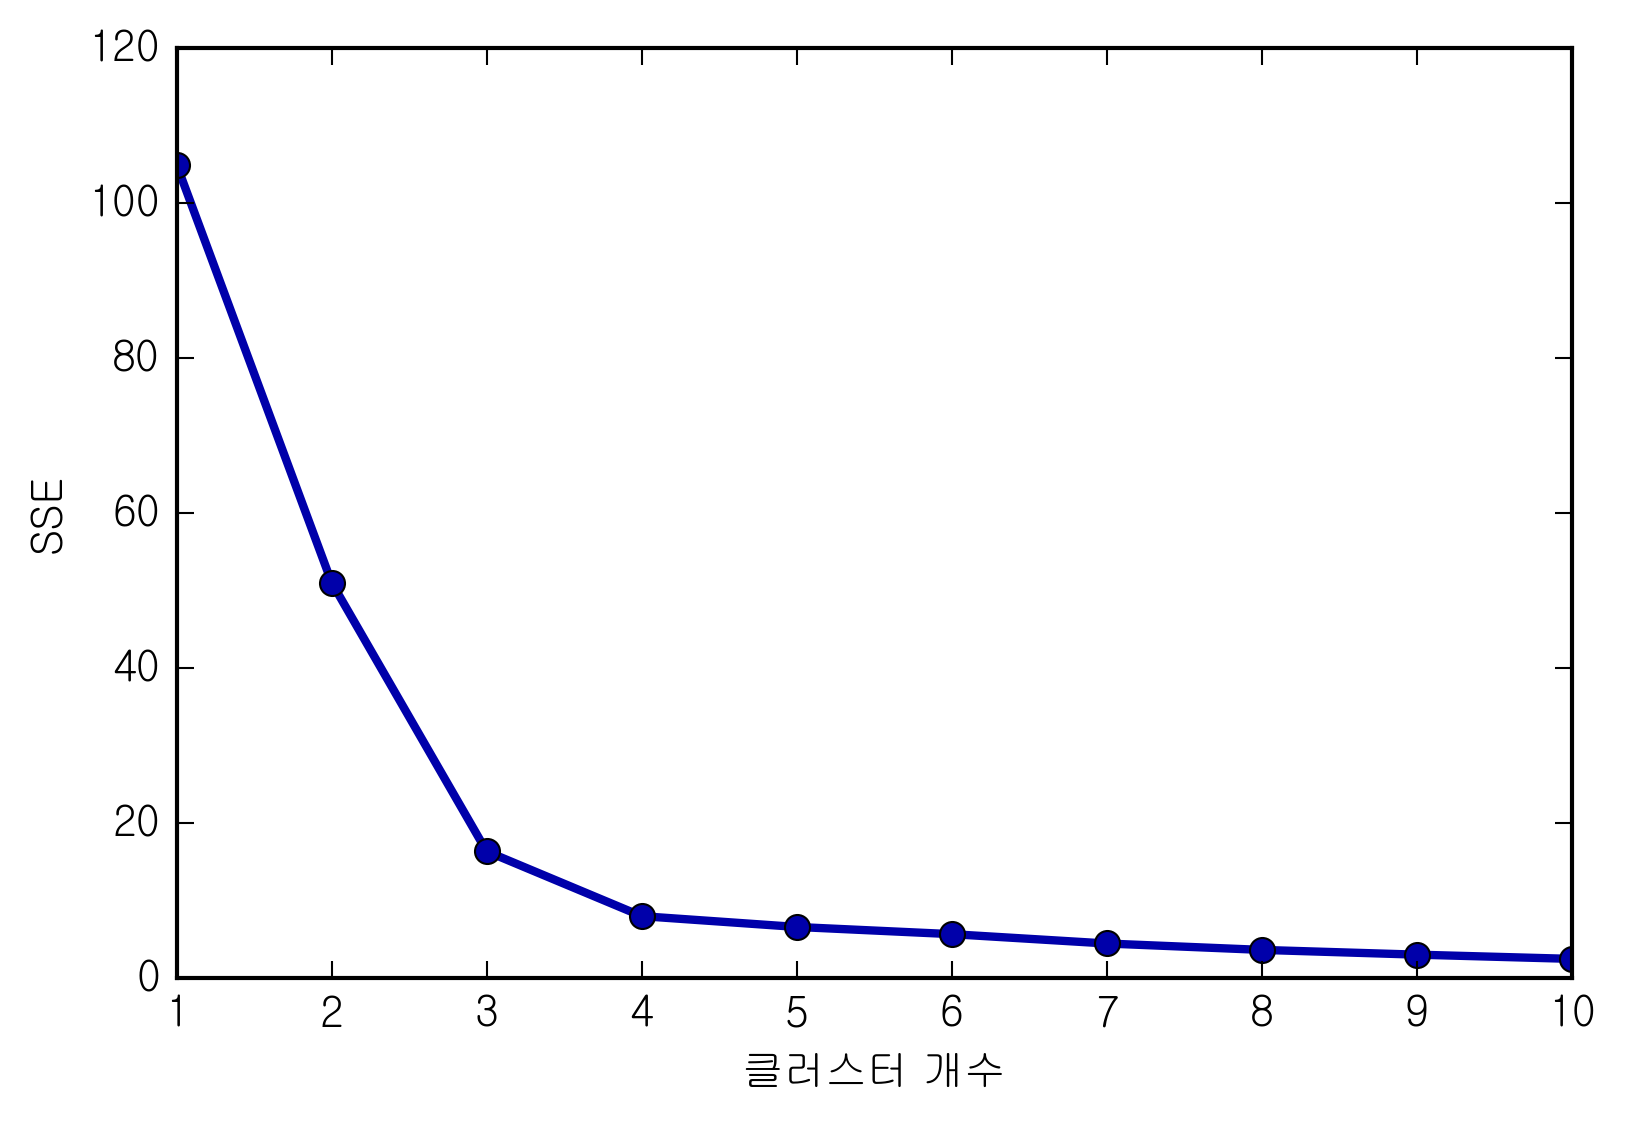

In [149]:
def elbow_fun(X):
    sse = []
    for i in range(1, 11):
        km = KMeans(n_clusters=i)
        km.fit(X)
        sse.append(km.inertia_)
    
    plt.plot(range(1, 11), sse, marker='o')
    plt.xlabel('클러스터 개수')
    plt.ylabel('SSE')
    plt.show()
    
elbow_fun(heightweight_z)

### 예제 6
실루엣 계수를 이용하여 예제 4의 분석결과를 평가하시오.<br>

In [196]:
from sklearn.metrics.cluster import silhouette_score

<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>
<br><br><br><br><br><br><br><br><br><br><br><br><br>

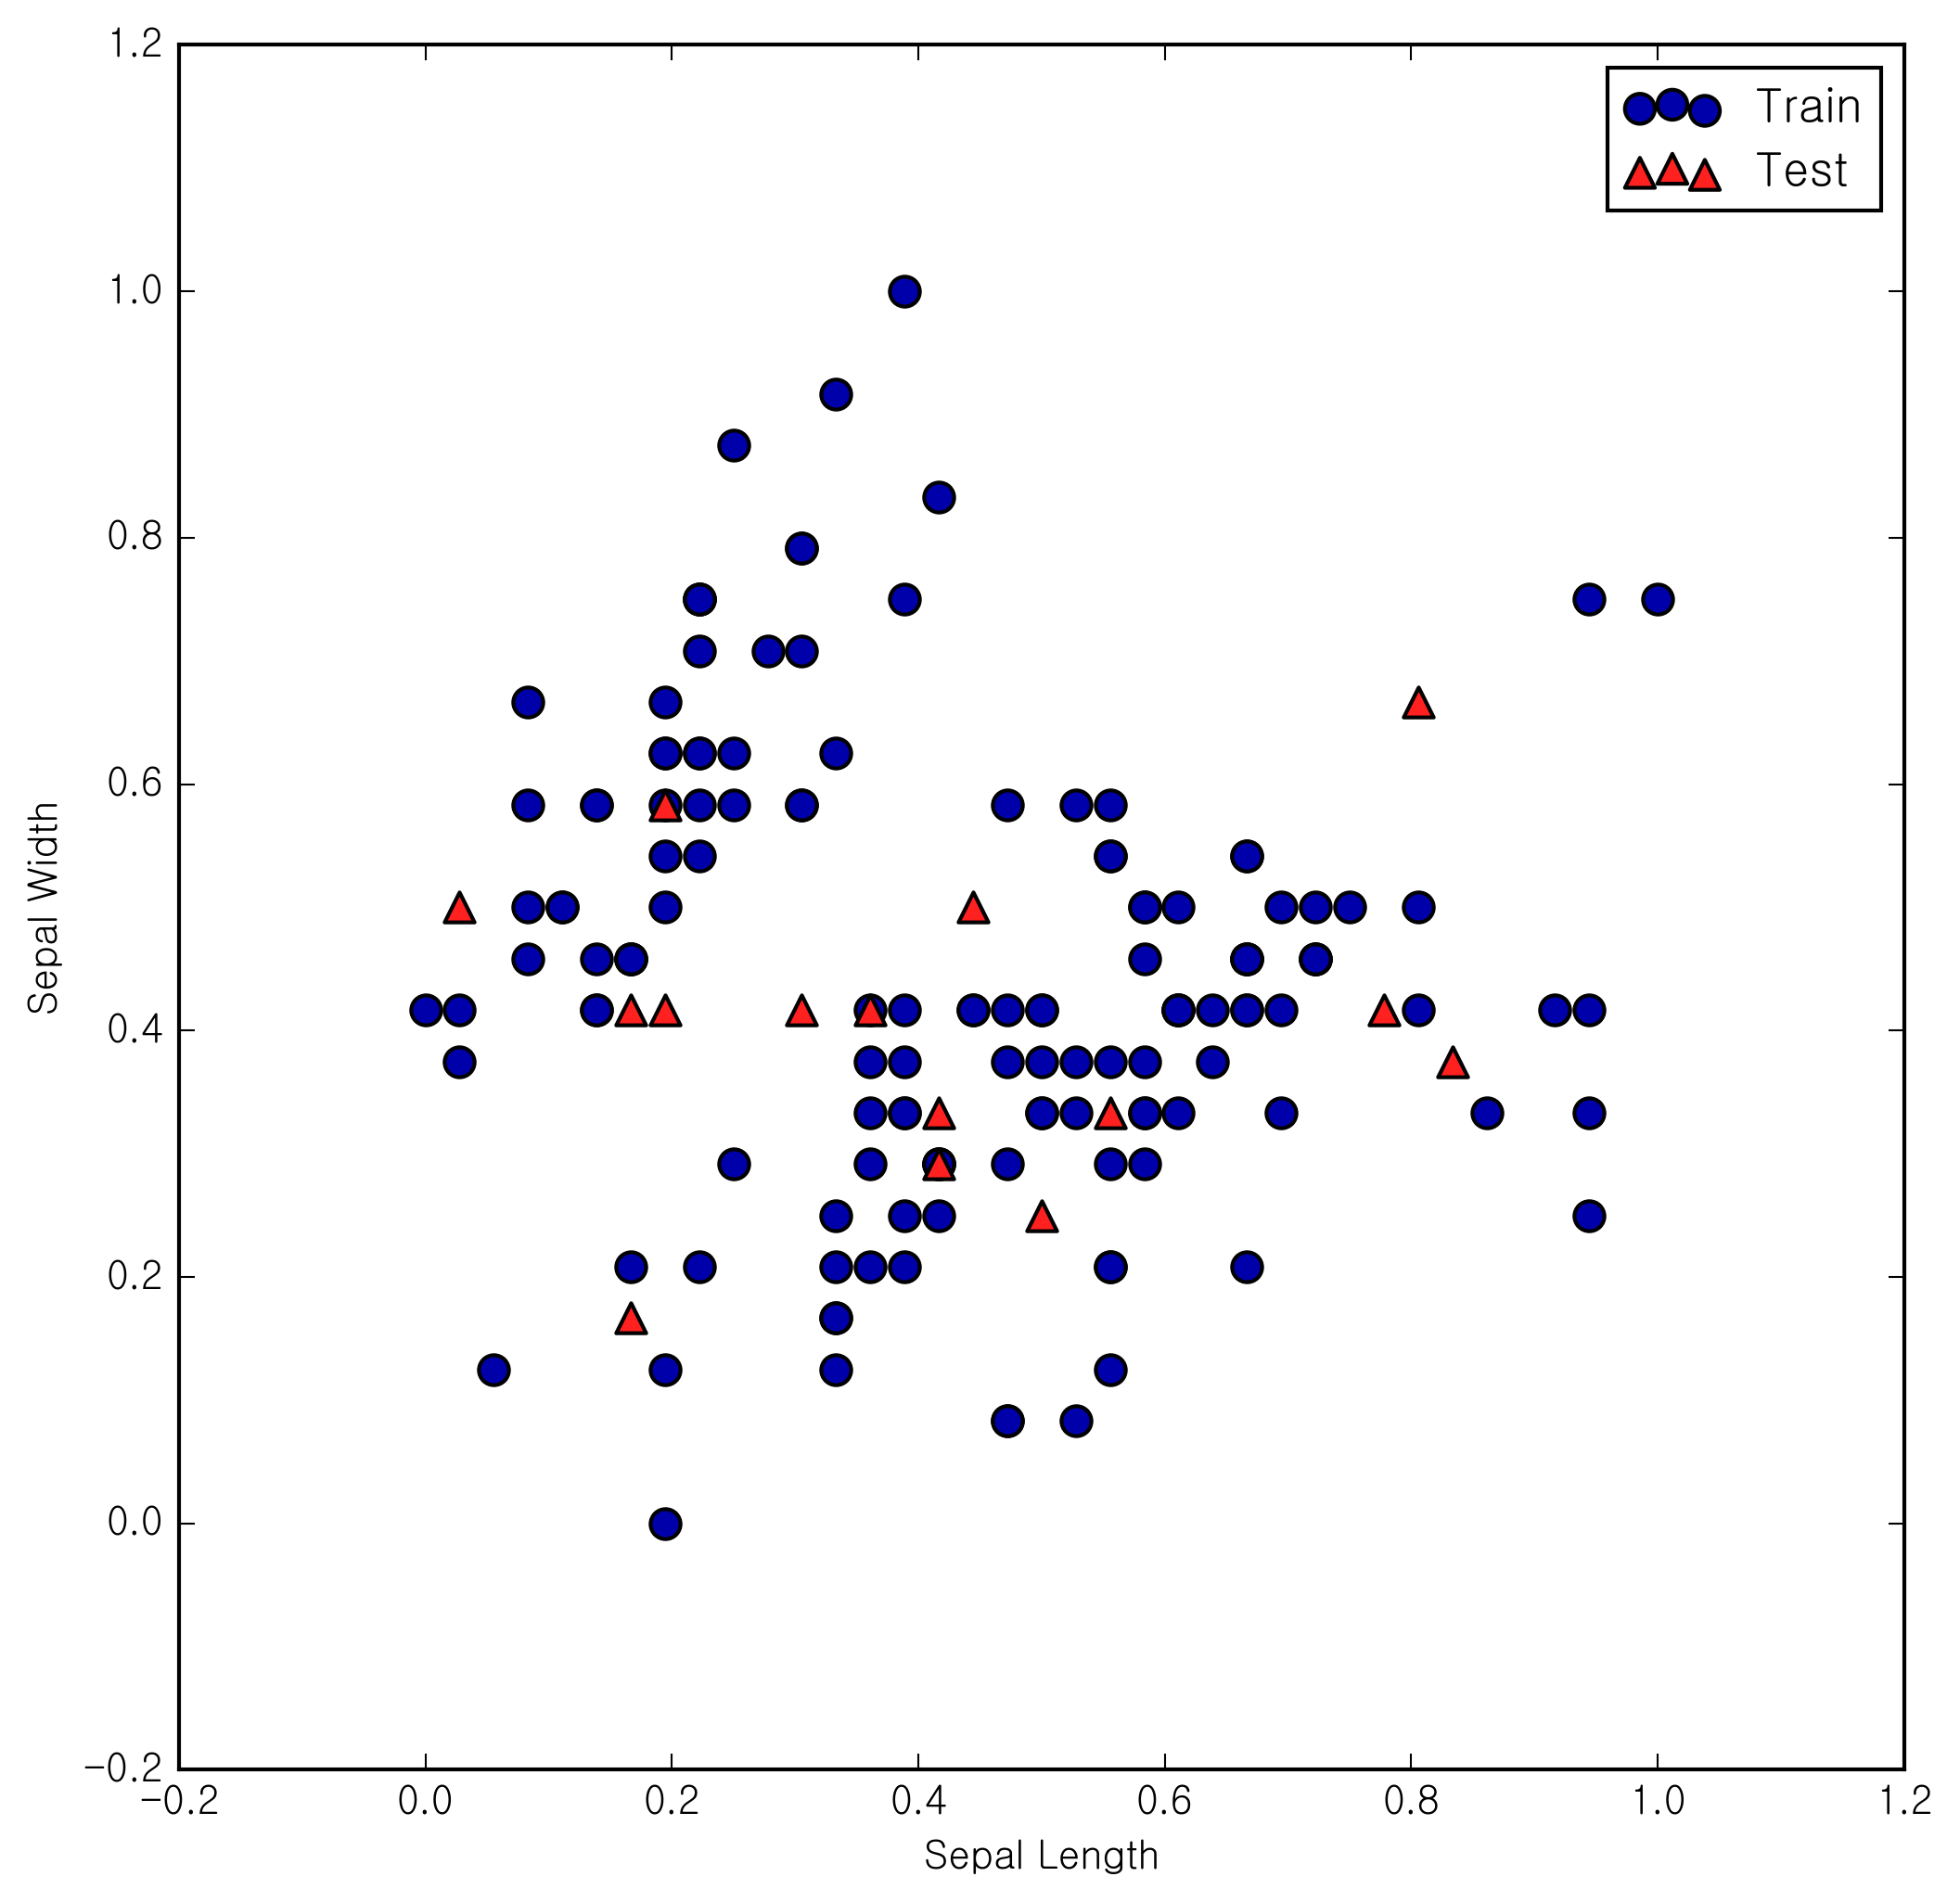

In [36]:
#### 1번
X_train, X_test = train_test_split(X, random_state=5, test_size=.1)

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

plt.figure(figsize=(8, 8))
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1],
                c=mglearn.cm2(0), s=60)
plt.scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], marker='^',
                c=mglearn.cm2(1), s=60)

plt.legend(['Train', 'Test'], loc="best")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")

In [89]:
#### 2번
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=510)
svm = SVC(C=100) # C 값은 모델 규제용 
svm.fit(X_train, y_train)
print("테스트 세트 정확도: {:.2f}".format(svm.score(X_test, y_test)))

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 조정된 데이터로 SVM 학습
svm.fit(X_train_scaled, y_train)

# 스케일 조정된 테스트 세트의 정확도
print("스케일 조정된 테스트 세트의 정확도: {:.2f}".format(svm.score(X_test_scaled, y_test)))

테스트 세트 정확도: 0.86
스케일 조정된 테스트 세트의 정확도: 0.91


원본 데이터 형태: (150, 4)
축소된 데이터 형태: (150, 2)


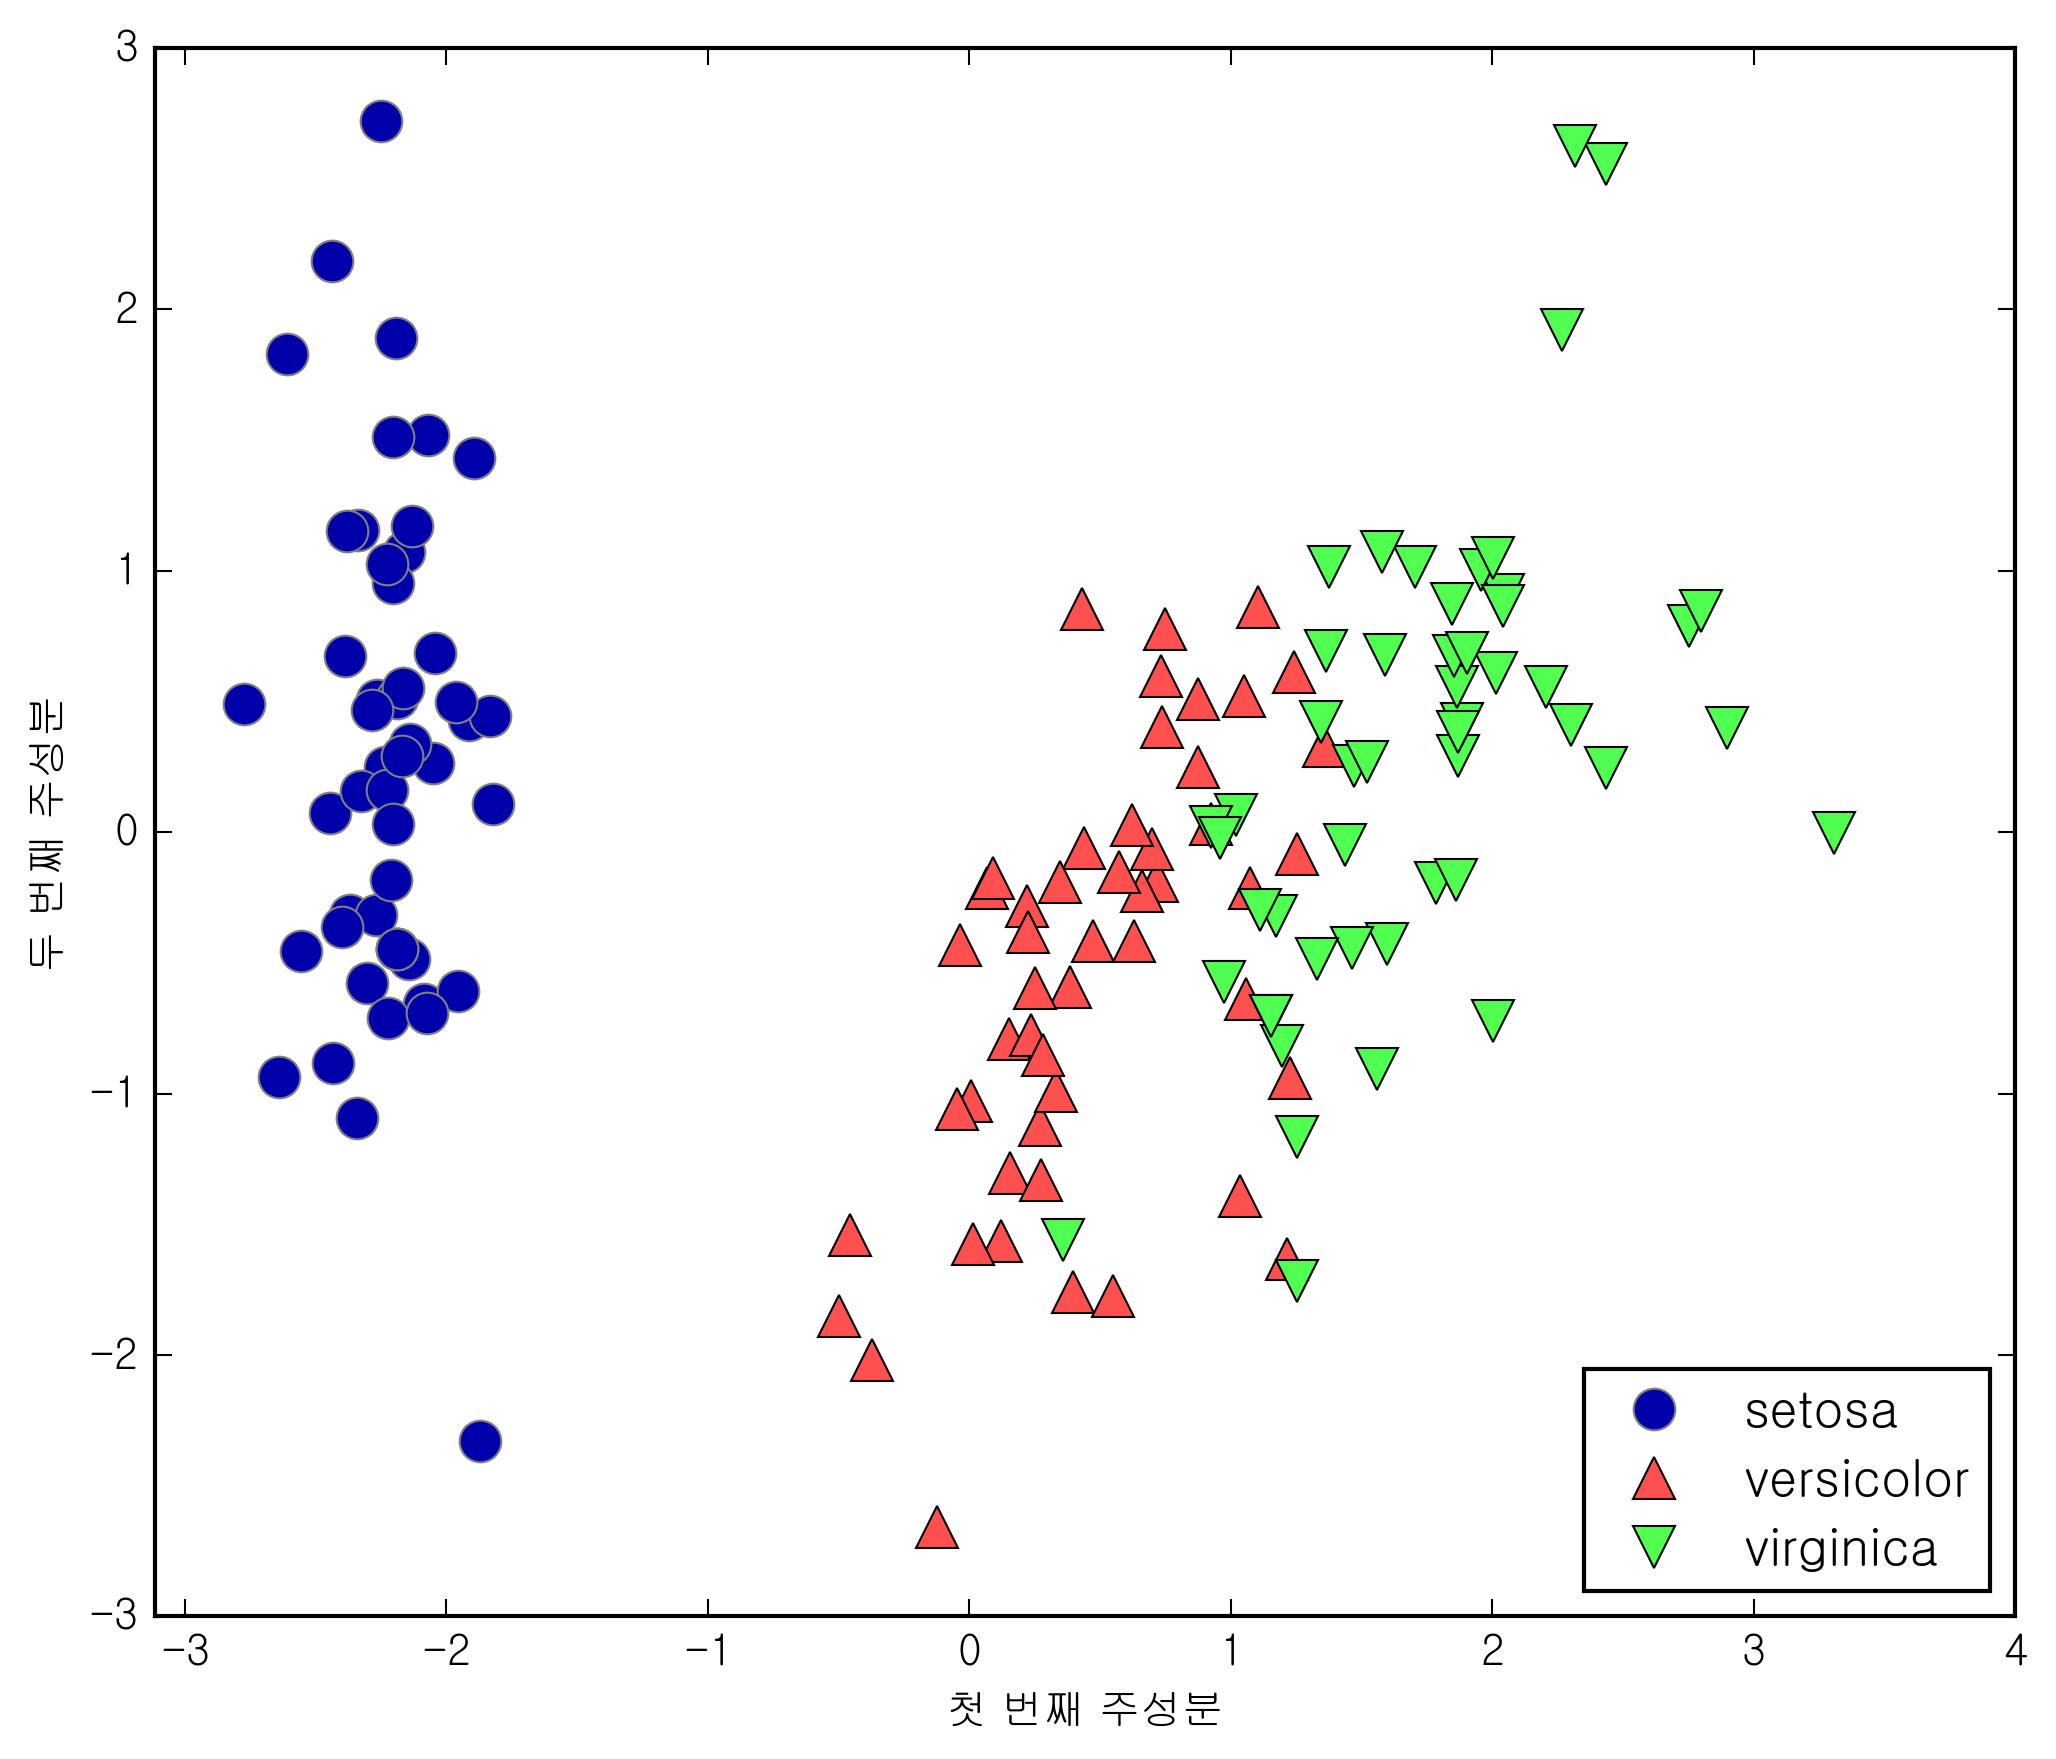

In [107]:
#### 3번

# 데이터의 처음 두 개 주성분만 유지시킵니다
pca = PCA(n_components=2)
# iris 데이터로 PCA 모델을 만듭니다
pca.fit(X_scaled)

# 처음 두 개의 주성분을 사용해 데이터를 변환합니다
X_pca = pca.transform(X_scaled)
print("원본 데이터 형태: {}".format(str(X_scaled.shape)))
print("축소된 데이터 형태: {}".format(str(X_pca.shape)))

# 클래스를 색깔로 구분하여 처음 두 개의 주성분을 그래프로 나타냅니다.
plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], iris.target)
plt.legend(['setosa', 'versicolor', 'virginica'], loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("첫 번째 주성분")
plt.ylabel("두 번째 주성분")

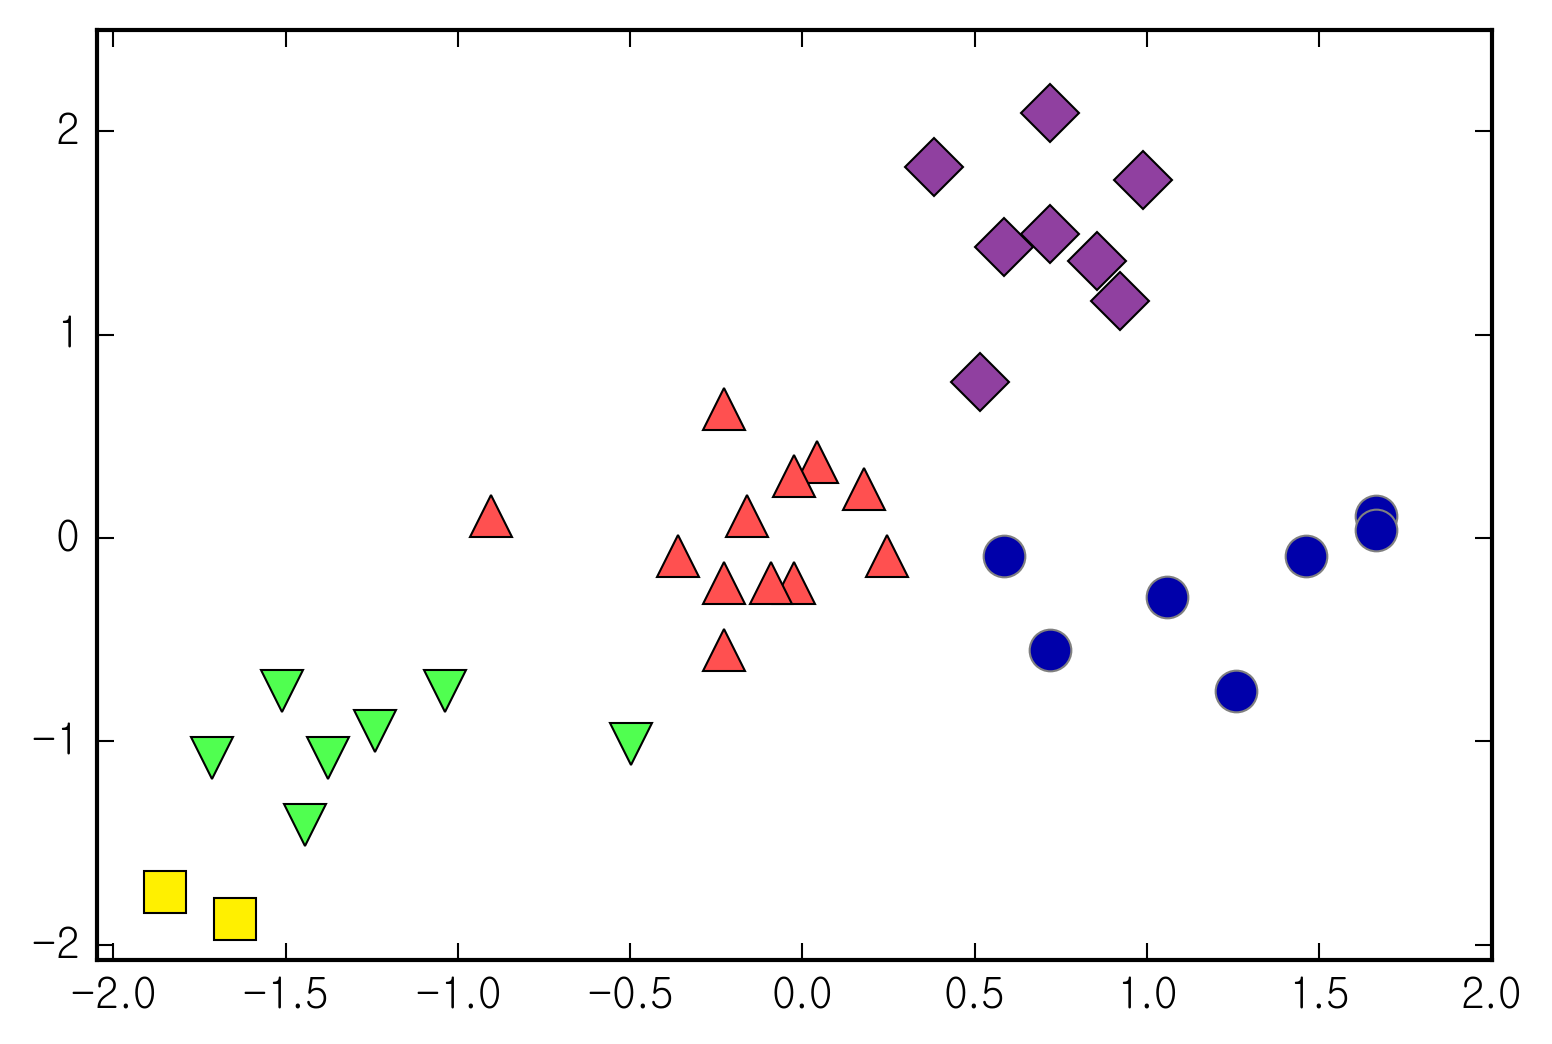

In [153]:
#### 4번

# z 정규화
zscore = lambda x : (x - x.mean())/ x.std() # 정규화 식을 lamda를 이용해 함수 zscore 생성
heightweight_z = heightweight.apply(zscore) # 정규화 함수를 이용해 새로운 dataframe 생성
heightweight_z.head()

cluster2 = KMeans(n_clusters= 5).fit(heightweight_z) # 3 그룹으로 클러스터링
heightweight_z['cluster2'] = cluster2.labels_[:] # example1과 다르게 dataframe 내부에 정보 삽입

mglearn.discrete_scatter(heightweight_z['Weight'], heightweight_z['Height'], heightweight_z['cluster2'])

In [152]:
#### 5번
#클러스터수가 4개일때 부터 SSE의 감소량이 이전에 비해 작은 것을 볼수 있음,
#따라서, 적정 클러스터 수는 4, 5개 정도라고 볼 수 있음


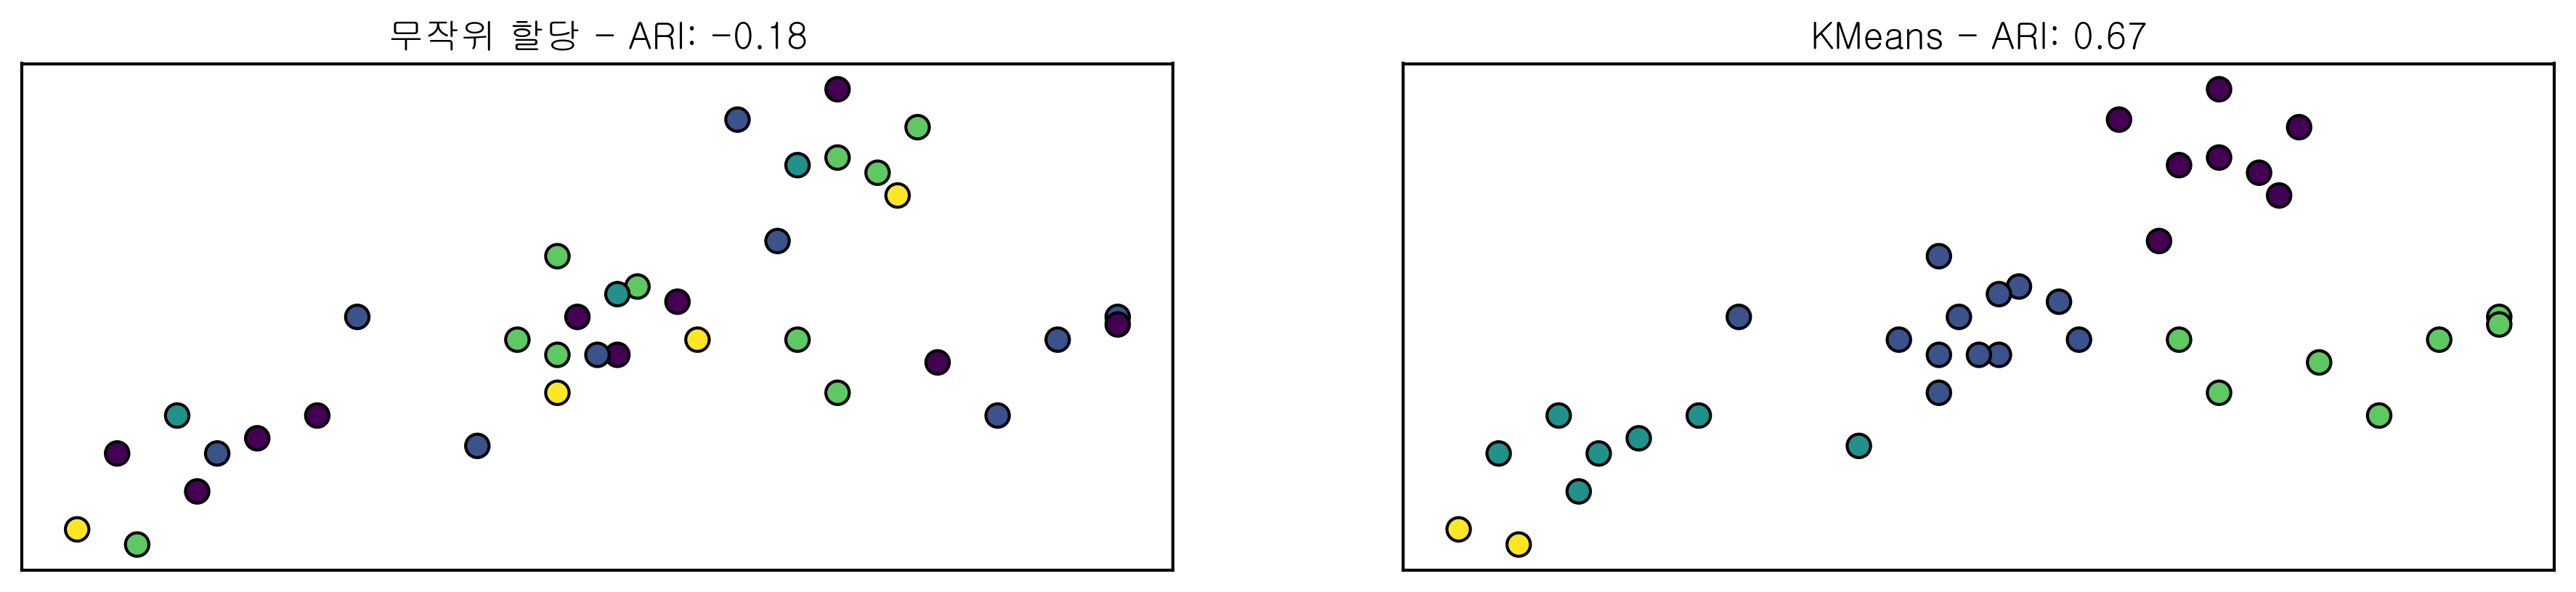

In [197]:
#### 6번

fig, axes = plt.subplots(1, 2, figsize=(15, 3), subplot_kw={'xticks': (), 'yticks': ()})

# 무작위 클러스터
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=5, size=len(heightweight_z))

axes[0].scatter(heightweight_z['Weight'], heightweight_z['Height'], c=random_clusters, s=60, edgecolors='black')
axes[0].set_title("무작위 할당 - ARI: {:.2f}".format(silhouette_score(heightweight_z, random_clusters)))

clusters = KMeans(n_clusters=5).fit_predict(heightweight_z)
axes[1].scatter(heightweight_z['Weight'], heightweight_z['Height'], c=heightweight_z['cluster2'], s=60, edgecolors='black')
axes[1].set_title("KMeans - ARI: {:.2f}".format(silhouette_score(heightweight_z, clusters)))

실루엣 점수 확인 결과 무작위 할당의 경우 -0.18, KMeans의 경우 0.67의 결과를 보였음